In [1]:
from analyse_logs import *

op_df = get_op_df(log_path)
op_df


,opid,method,reply_received,params,start_time,result,end_time,time,topic
0,101,discv5_registerTopic,True,"[4, 101]",1665677823580,None,1665677823587,7,4.0
1,102,discv5_registerTopic,True,"[3, 102]",1665677823710,None,1665677823715,5,3.0
2,103,discv5_registerTopic,True,"[1, 103]",1665677823841,None,1665677823846,5,1.0
3,104,discv5_registerTopic,True,"[1, 104]",1665677823853,None,1665677823858,5,1.0
4,105,discv5_registerTopic,True,"[1, 105]",1665677823895,None,1665677823897,2,1.0
5,106,discv5_registerTopic,True,"[1, 106]",1665677823927,None,1665677823929,2,1.0
6,107,discv5_registerTopic,True,"[1, 107]",1665677824016,None,1665677824021,5,1.0
7,108,discv5_registerTopic,True,"[3, 108]",1665677824144,None,1665677824149,5,3.0
8,109,discv5_registerTopic,True,"[3, 109]",1665677824263,None,1665677824268,5,3.0
9,110,discv5_registerTopic,True,"[4, 110]",1665677824357,None,1665677824362,5,4.0


<AxesSubplot:title={'center':'Operation returned'}, ylabel='reply_received'>

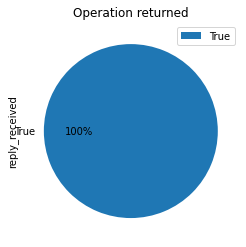

In [3]:
op_df['reply_received'].value_counts().plot(kind = 'pie', autopct='%1.0f%%', legend=True, title='Operation returned')

/home/harnen/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:xlabel='method', ylabel='time'>

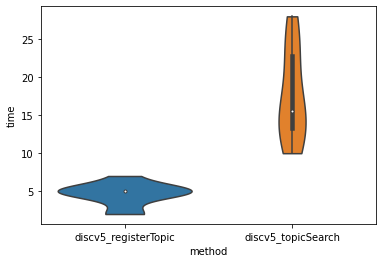

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots()
df = op_df[~op_df['time'].isna()]
df
sns.violinplot(x='method',y='time', data=df, ax = axes, cut=0)
#axes.set_title('Day Ahead Market')

In [6]:
from analyse_logs import *

msg_df = get_msg_df(log_path, op_df)
msg_df

Reading node-1.log
Reading node-2.log


,node_id,peer_id,in_out,timestamp,msg_type,req_id,key,opid,topic,op_type
112,1,2,out,2022-10-13 17:17:03.844811+01:00,FINDNODE/v5,0x1c34021a534677ad,NaN,103.0,1.0,discv5_registerTopic
222,2,1,out,2022-10-13 17:17:03.845087+01:00,NODES/v5,0x1c34021a534677ad,NaN,103.0,1.0,discv5_registerTopic
223,2,1,out,2022-10-13 17:17:03.845188+01:00,NODES/v5,0x1c34021a534677ad,NaN,103.0,1.0,discv5_registerTopic
246,2,9,out,2022-10-13 17:17:04.148012+01:00,FINDNODE/v5,0xe98ac2aedd00f686,NaN,108.0,3.0,discv5_registerTopic
247,2,6,out,2022-10-13 17:17:04.148171+01:00,FINDNODE/v5,0xcb638eedd17a4f40,NaN,108.0,3.0,discv5_registerTopic
248,2,3,out,2022-10-13 17:17:04.148287+01:00,FINDNODE/v5,0x366b39aa2047aea0,NaN,108.0,3.0,discv5_registerTopic
252,2,6,out,2022-10-13 17:17:04.149150+01:00,REGTOPIC/v5,0x8cfd73a8c5f4c7ea,3.0,108.0,3.0,discv5_registerTopic
253,2,4,out,2022-10-13 17:17:04.149250+01:00,FINDNODE/v5,0xb0972a22267c6ca7,NaN,108.0,3.0,discv5_registerTopic
254,2,5,out,2022-10-13 17:17:04.149404+01:00,FINDNODE/v5,0x421008036e96ff2e,NaN,108.0,3.0,discv5_registerTopic
255,2,8,out,2022-10-13 17:17:04.149507+01:00,FINDNODE/v5,0x5566de30ea23882a,NaN,108.0,3.0,discv5_registerTopic


In [7]:
#set the missing opids and op_types to all the messages being part of operations
#print(msg_df)
#for opid in set([i for i in op_df['opid']]):
#    print(opid)
#    op_type = op_df.loc[op_df['opid'] == opid, 'method'].values[0]
#    topic = op_df.loc[op_df['opid'] == opid, 'topic'].values[0]
#    for req_id in set([i for i in msg_df[msg_df['opid'] == opid]['req_id']]):
#        msg_df.loc[msg_df["req_id"] == req_id, "opid"] = opid
#        msg_df.loc[msg_df['req_id'] == req_id, 'op_type'] = op_type
#        msg_df.loc[msg_df['req_id'] == req_id, 'topic'] = topic


# TODO: this is very slow now! 
#msg_df

discv5_registerTopic
	 discv5_registerTopic
		 FINDNODE/v5 1
		 NODES/v5 2
	 discv5_registerTopic
		 FINDNODE/v5 9
		 REGTOPIC/v5 4


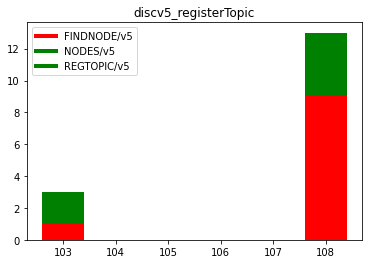

In [9]:
from matplotlib.lines import Line2D

msg_df = msg_df.dropna(subset=['opid'])

colors = ['red', 'green', 'blue', 'yellow']
for op_type, group_op_type in msg_df.groupby('op_type'):
    #if(op_type != 'discv5_registerTopic'):
        #continue
    print(op_type)
    fig, ax = plt.subplots()
    legend_elements = []
    added = set()
    for opid, group_opid in group_op_type.groupby('opid'):
        print("\t", op_type)
        i = 0
        sum = 0
        for msg_type, group_msg_type in group_opid.groupby('msg_type'):
            val = len(group_msg_type)
            ax.bar(opid, val, color=colors[i], bottom = sum)
            sum += val
            print("\t\t", msg_type, len(group_msg_type))
            if(msg_type not in added):
                added.add(msg_type)
                legend_elements.append(Line2D([0], [0], color=colors[i], lw=4, label=msg_type))
            i += 1
    ax.legend(handles=legend_elements)
    ax.set_title(op_type)
plt.show()

<AxesSubplot:title={'center':'Msgs sent/received'}, ylabel='in_out'>

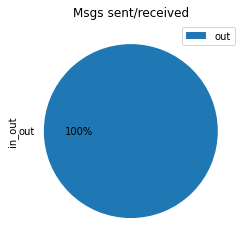

In [10]:
msg_df['in_out'].value_counts().plot(kind='pie', autopct='%1.0f%%', legend=True, title='Msgs sent/received')

Text(0, 0.5, '#Messages')

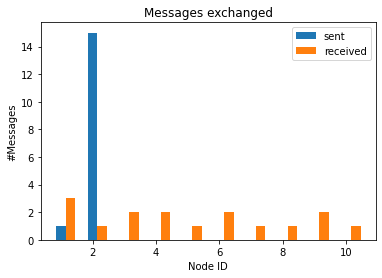

In [11]:
import matplotlib.pyplot as plt

sent = msg_df[msg_df['in_out'] == 'out']['node_id'].value_counts().to_dict()
sent = {int(k):int(v) for k,v in sent.items()} #convert IDs to int

received = msg_df[msg_df['in_out'] == 'out']['peer_id'].value_counts().to_dict()
received = {int(k):int(v) for k,v in received.items()} #convert IDs to int

width =0.3
plt.bar(sent.keys(), sent.values(), width=width, label = 'sent')
plt.bar([x + width for x in received.keys()], received.values(), width=width, label = 'received')
plt.legend()
plt.title('Messages exchanged')
plt.xlabel('Node ID')
plt.ylabel('#Messages')

<AxesSubplot:xlabel='in_out', ylabel='count'>

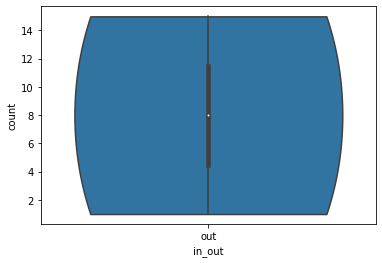

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots()
df_in = msg_df[msg_df['in_out']=='in']['node_id'].value_counts().rename_axis('node_id').reset_index(name='count')
df_in['in_out'] = 'in'
df_out = msg_df[msg_df['in_out']=='out']['node_id'].value_counts().rename_axis('node_id').reset_index(name='count')
df_out['in_out'] = 'out'

df = pd.concat([df_in, df_out], axis=0)
sns.violinplot(x='in_out', y='count', data=df, ax = axes, cut=0, title='#Msg received/sent distribution per node')

<AxesSubplot:>

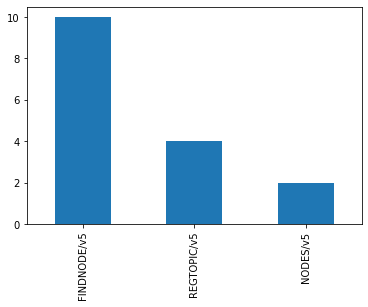

In [14]:
msg_df['msg_type'].value_counts().plot(kind='bar')

discv5_registerTopic


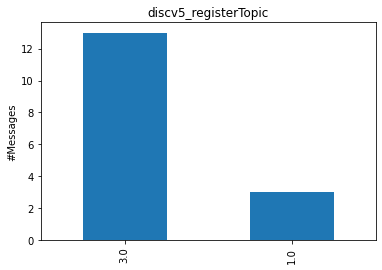

In [15]:
import numpy as np
import math
import hashlib

for op_type, group_op_type in msg_df.groupby('op_type'):
    print(op_type)
    fig, ax = plt.subplots()
    group_op_type['topic'].value_counts().plot(kind='bar', title=op_type)
    ax.set_ylabel("#Messages")



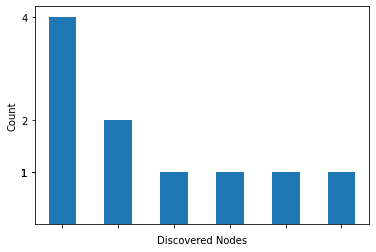

In [16]:
op_df_exploded = op_df.copy()
op_df_exploded = op_df_exploded.explode('result')
fig, axes = plt.subplots()
op_df_exploded['result'].value_counts().plot(ax = axes,kind='bar')
axes.set_xticklabels([])
axes.set_xlabel("Discovered Nodes")
axes.set_ylabel("Count")
axes.set_yticks(list(op_df_exploded['result'].value_counts()))

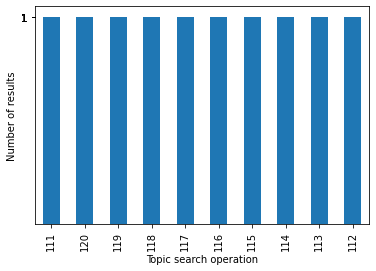

In [17]:
op_df_droppedNone = op_df_exploded.dropna(subset=['result'])
fig, axes = plt.subplots()
op_df_droppedNone['opid'].value_counts().plot(ax=axes, kind='bar')
axes.set_xlabel("Topic search operation")
axes.set_ylabel("Number of results")
axes.set_yticks(list(op_df_droppedNone['opid'].value_counts()))